In [82]:
#link to ipynb : https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/NLP%20(Natural%20Language%20Processing).ipynb


!conda install nltk #this installs nltk

Solving environment: done

# All requested packages already installed.



In [2]:
import nltk #imports the library

In [3]:
nltk.download() #download the necessary datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
pwd

'/Users/wuraolaifeoluwa/Documents/Rasheed data doc /ipynb files'

In [5]:
messages = [line.rstrip() for line in open ('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/smsspamcollection/SMSSpamCollection')]

In [6]:
print (len(messages))

5574


In [7]:
#for loop to show the messages
for num, message in enumerate(messages[:10]):
    print (num, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
import pandas as pd

In [9]:
#use pandas to convert the forloop to a pandas Dataframe
messages = pd.read_csv(r'/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/smsspamcollection/SMSSpamCollection',
                       sep = '\t', names=['labels','message'])

In [10]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
#group messages by labels
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [14]:
#create another column length to know the length of the messages
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([1.660e+02, 1.456e+03, 9.990e+02, 6.120e+02, 4.460e+02, 3.010e+02,
        3.180e+02, 4.060e+02, 6.580e+02, 7.300e+01, 2.600e+01, 1.500e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.400e+01, 8.000e+00, 9.000e+00,
        5.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

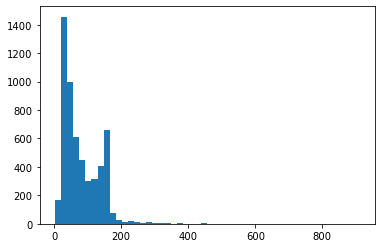

In [16]:
#visualizing the length of messages
plt.hist(messages['length'], bins=50)

<AxesSubplot:ylabel='Frequency'>

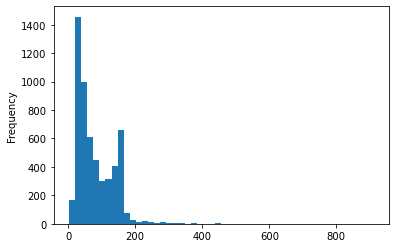

In [17]:
#previous code can also be written like this
messages['length'].plot(bins=50, kind = 'hist')

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
mes = messages[messages['length'] == 910]
mes

,labels,message,length
1085,ham,For me the love should start with attraction.i...,910


In [20]:
mes['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

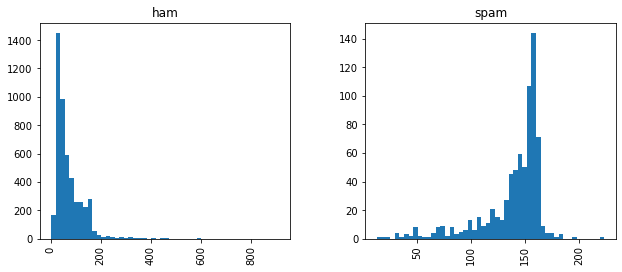

In [21]:
messages.hist(column = 'length', by='labels', bins=50, figsize=(10,4))

In [22]:
import string

In [23]:
mess = 'Sample message! Notice: it has punctuation'

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
nopunc = [char for char in mess if char not in string.punctuation]

In [26]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [27]:
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
#stpwords are basically english words or words in other language
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [34]:
#SUMMARY OF THE ABOVE STEPS I.E THE ABOVE STEPS CAN BE DONE LIKE THIS

def text_process(mess):
    '''
    Takes in a string of test, then perform the following;
    1. remove all punctuation
    2. remove all stopwords
    3. returns a list of the cleaned text
    '''
    #check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    #now just remove any stopwords
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
#just to see how our normaliation looks
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [37]:
#because inplace is not passed as True in the above code, message when called is still the same as the previous
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## VECTORIZATION

Currently we have the messages as lists of tokens(also know as lemmas) and now we need to convert eachof those messages into a vector the scikit learn's algorithms models can work with.

we will do that in 3 steps using the bag-of-words model:

    1. count how many times does a word occur in each messagge(known as term frequency)
    
    2. weigh the counts, so that frequent tokens get lower weight(inverse document frequency)
    
    3. normalize the vectors to unit length, to abstract from the original text length(L2 norm)
    

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#bow = bag_of_words
bow_transformer = CountVectorizer(analyzer=text_process)

In [40]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x7fdf3e5b0dc0>)

In [41]:
message4 = messages['message'][3]

In [42]:
print(message4)

U dun say so early hor... U c already then say...


In [44]:
#counting how many times a word occurs in bow4
bow4 = bow_transformer.transform([message4])

In [45]:
#nums (4068,---,9554) signified the words and (2,1---2) signifies the frequency in bow4
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [49]:
#to check the word that occurs
print (bow_transformer.get_feature_names()[4068])

U


In [50]:
print (bow_transformer.get_feature_names()[9554])

say


In [51]:
#repeating the same process; counting the times a word occcurs in messages
messages_bow = bow_transformer.transform(messages['message'])

In [54]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-zero occurences:  50548
sparsity: 0.08%


In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [59]:
tdidf4 = tfidf_transformer.transform(bow4)

In [60]:
print (tdidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [61]:
mess_tfidf = tfidf_transformer.transform(messages_bow)

In [62]:
print(mess_tfidf.shape)

(5572, 11425)


## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
spam_detect_model = MultinomialNB().fit(mess_tfidf, messages['labels'])

In [69]:
print('Predicted: ', spam_detect_model.predict(tdidf4)[0])
print ('expected:', messages.labels[3])

Predicted:  ham
expected: ham


## Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's beginby getting all the predictions:

In [72]:
all_predictions = spam_detect_model.predict(mess_tfidf)
print (all_predictions)


['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [73]:
from sklearn.metrics import classification_report
print (classification_report(messages['labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [75]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['labels'], test_size=0.2)

In [76]:
print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## creating data piplines
We will use SciKit Learn's pipeline capabilities to store a pipline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [77]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [78]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fdf3e5b0dc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [79]:
predictions = pipeline.predict(msg_test)

In [81]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1003
        spam       0.74      1.00      0.85       112

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.97      0.97      0.97      1115

